# TCR FLOWER PLOT
**Author: Juan Sebastian Diaz Boada**<br>
*juan.sebastian.diaz.boada@ki.se*<br>
26/01/22<br>
Kernel: `network_ravi`<br>

In [1]:
import sys, os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from polyleven import levenshtein as poly_lev
from collections import defaultdict
import igraph as ig
import random # layout seed
import cairo as cr
from igraph.drawing.text import TextDrawer
from math import pi # Legend circles
#import blosum as bl
from PIL import ImageColor # Hex to RGB
from operator import add # sum lists

In [2]:
# from ../bin
import bin.spring_functions as kxs
from bin.data_functions import group_with_freq

## Parameters

In [3]:
pd.set_option('display.max_columns',None)

#### Data parameters

In [4]:
# # Input file
# patient = 'P6'
# in_file = 'results/datasets/P6_clonality.csv'

In [11]:
# Input file
#patient = 'all'
in_file = 'data/external_data/flower_plots/expanded_clones_gamma_delta.tsv'

In [6]:
min_seq2show = 0 # integer
group_unique = True # Boolean

#### Figure parameters

In [68]:
# Similarity threshold
similarity = 0 # non-negative integer
# Layout
layout_name = 'FR' # Can be FR, DH, DrL, GO, LgL, MDS
unit=50
node_size=30
edge_width = 0.75
img_format = '.pdf'

#### Output filenames

In [10]:
# experiment = chain + '_' + HLA
# df_file = '../data/intermediate_data/filtered_data/COMPLETE_FILT_' + experiment + '.csv'
# dist_file = '../data/intermediate_data/dist_mat/COMPLETE_DIST_' + experiment + '.csv'
# fig_name = '../results/figures/COMPLETE_PLOT_'+ experiment + '_similarity_' + \
#             str(similarity) + '_' + img_format
# print(df_file)
# print(dist_file)
fig_name = 'results/figures/FLOWER_PLOT_gamma-delta'+ img_format
print(fig_name)

results/figures/FLOWER_PLOT_gamma-delta.pdf


# I. Data treatment and filltering
0. Import data
1. Filter by patient and select columns
2. Filter by tissue
3. Filter by method
4. Filter by plasma value
5. Remove spaces in column names
6. Filter by chain
7. Group CDR3 sequences
8. Remove clusters with fewer than `min_seq2show` sequences
9. Turn plasma values into strings (for legend names)

In [43]:
# 0. Import data
df = pd.read_csv(in_file,index_col=0,sep='\t')
df

,cloneGD_descr_aa,Sequence,tissue,freq_cloneGDaa,group_cloneGDaa,Patient_ID,treatment.status,clusters,Unnamed: 7,Unnamed: 8
Plate72_MUSL_B18,"{'ALWEGYKKL', 'AFTTFLLRYTDKLI', 'ACDNVAGRFYTDK...",ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,MUSL,12,0,2,naive,8,NaN,NaN
Plate72_MUSL_G24,"{'ALWEGYKKL', 'AFTTFLLRYTDKLI', 'ACDNVAGRFYTDK...",ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,MUSL,12,0,2,naive,5,NaN,NaN
Plate72_MUSL_H8,"{'ALWEGYKKL', 'AFTTFLLRYTDKLI', 'ACDNVAGRFYTDK...",ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,MUSL,12,0,2,naive,11,NaN,NaN
Plate72_PB_L13,"{'ALWEGYKKL', 'AFTTFLLRYTDKLI', 'ACDNVAGRFYTDK...",ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,PB,12,0,2,naive,8,NaN,NaN
Plate72_PB_O17,"{'ALWEGYKKL', 'AFTTFLLRYTDKLI', 'ACDNVAGRFYTDK...",ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,PB,12,0,2,naive,8,NaN,NaN
Plate72_PB_O3,"{'ALWEGYKKL', 'AFTTFLLRYTDKLI', 'ACDNVAGRFYTDK...",ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,PB,12,0,2,naive,8,NaN,NaN
Plate72_PB_N8,"{'ALWEGYKKL', 'AFTTFLLRYTDKLI', 'ACDNVAGRFYTDK...",ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,PB,12,0,2,naive,3,NaN,NaN
Plate72_PB_N17,"{'ALWEGYKKL', 'AFTTFLLRYTDKLI', 'ACDNVAGRFYTDK...",ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,PB,12,0,2,naive,8,NaN,NaN
Plate70_MUSL_D21,"{'ALWELYYYKKL', 'ALGELSIDWGIEKYTDKLI'}",ALWELYYYKKLALGELSIDWGIEKYTDKLI,MUSL,5,1,7,naive,5,NaN,NaN
Plate70_MUSL_E24,"{'ALWELYYYKKL', 'ALGELSIDWGIEKYTDKLI'}",ALWELYYYKKLALGELSIDWGIEKYTDKLI,MUSL,5,1,7,naive,5,NaN,NaN


In [44]:
df.columns

Index(['cloneGD_descr_aa', 'Sequence', 'tissue', 'freq_cloneGDaa',
       'group_cloneGDaa', 'Patient_ID', 'treatment.status', 'clusters',
       'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [45]:
df = df.drop(['cloneGD_descr_aa','freq_cloneGDaa',
       'group_cloneGDaa', 'Patient_ID', 'treatment.status',
       'Unnamed: 7', 'Unnamed: 8'],axis=1)
df

,Sequence,tissue,clusters
Plate72_MUSL_B18,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,MUSL,8
Plate72_MUSL_G24,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,MUSL,5
Plate72_MUSL_H8,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,MUSL,11
Plate72_PB_L13,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,PB,8
Plate72_PB_O17,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,PB,8
Plate72_PB_O3,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,PB,8
Plate72_PB_N8,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,PB,3
Plate72_PB_N17,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,PB,8
Plate70_MUSL_D21,ALWELYYYKKLALGELSIDWGIEKYTDKLI,MUSL,5
Plate70_MUSL_E24,ALWELYYYKKLALGELSIDWGIEKYTDKLI,MUSL,5


In [ ]:
# Add sequence column adding all strings
#df = df.dropna(axis=1,how='all')
seq_cols = ['CDR3sequence_1','CDR3sequence_2']
#seq_cols = df.columns[df.columns.str.endswith('B1') | df.columns.str.endswith('B2')]
df.loc[:,seq_cols] = df.loc[:,seq_cols].fillna('')
df['Sequence'] = df.loc[:,seq_cols].sum(axis=1,numeric_only=False)
df

### Giving each $\alpha-\beta$ combination a numerical identifier

In [ ]:
if 3 in df['AB_productive'].unique():
    # Fix sequences that have more than one productive pair
    seq_df = df.loc[df['AB_productive']==3,seq_cols]
    seqs = np.unique(seq_df.values.flatten())
    # Enumerate sequences 
    seq_num = {j:i for i,j in enumerate(seqs)}
    num_df = seq_df.replace(seq_num)
    # Concatenate sequences in alphabetical order
    idx_1 = num_df.values.argmax(axis=1)
    seqs_1 = [seq_df.iloc[i,c] for i,c in enumerate(idx_1)]
    idx_2 = num_df.replace(to_replace=0, value=1000).values.argmin(axis=1)
    seqs_2 = [seq_df.iloc[i,c] for i,c in enumerate(idx_2)]
    seqs_joined = list(map(add, seqs_1, seqs_2))
    seq_df.loc[:,'Sequence'] = seqs_joined
    print(type(seq_df.loc[:,'Sequence']))
    # Fix it in original dataframe
    df.loc[df['AB_productive']==3,'Sequence'] = seq_df.loc[:,'Sequence']
#df = df.drop(seq_cols,axis=1)
df

In [46]:
group_with_freq(df,'Sequence',group_unique=False)

,Sequence,tissue,clusters,freq_Sequence,group_Sequence
Plate72_MUSL_B18,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,MUSL,8,8,0
Plate72_MUSL_G24,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,MUSL,5,8,0
Plate72_MUSL_H8,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,MUSL,11,8,0
Plate72_PB_L13,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,PB,8,8,0
Plate72_PB_O17,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,PB,8,8,0
Plate72_PB_O3,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,PB,8,8,0
Plate72_PB_N8,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,PB,3,8,0
Plate72_PB_N17,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,PB,8,8,0
Plate70_MUSL_D21,ALWELYYYKKLALGELSIDWGIEKYTDKLI,MUSL,5,5,1
Plate70_MUSL_E24,ALWELYYYKKLALGELSIDWGIEKYTDKLI,MUSL,5,5,1


### Custom color

In [47]:
color_dict = {0:"#999933",1:"#004949",2:"#009292",3:"#FF6DB6",
              4:"#FFB6DB",5:"#490092",6:"#006DDB",7:"#B66DFF",
              8:"#6DB6FF",9:"#B6DBFF",10:"#920000",11:"#924900",
              12:"#DB6D00",13:"#CAFF70",14:"#FFA07A",15:"#EEC591"}

In [48]:
df['color'] = df.loc[:,'clusters'].replace(color_dict)
df.sort_values('Sequence',inplace=True)
df

,Sequence,tissue,clusters,color
Plate404_MUSL_A19,AAWANGAGWFKIALGELSLPSYWGSCTDKLIATWDSGDENYYKKL,MUSL,2,#009292
Plate66_PB_J10,ACDTVAGDQYTDKLIALWDHRELGKKIKV,PB,6,#006DDB
Plate64_PB_K15,ACDTVGGLQTTDKLIALWEVQHGLLQELSKKNQG,PB,6,#006DDB
Plate68_PB_I14,ALGDSPFTGGYTDKLIATWDGLYYKKLF,PB,1,#004949
Plate406_PB_J12,ALGEDRWGIPWGRYTDKLIATWASGYYKKLF,PB,8,#6DB6FF
Plate60_PB_K13,ALGEEFVLRGNTLDKLIATWDGPRKKLF,PB,8,#6DB6FF
Plate406_PB_C10,ALGELQHQFPHRGYGTDKLIALWEVRYKKLF,PB,8,#6DB6FF
Plate406_PB_M18,ALGELQHQFPHRGYGTDKLIALWEVRYKKLF,PB,8,#6DB6FF
Plate404_MUSL_A12,ALGELSFLRGPYTDKLIATWSGNYKKLF,MUSL,0,#999933
Plate64_MUSL_E18,ALGELYLLGGYLPYTDKLIATWDDRYYKKLF,MUSL,0,#999933


### Shape

In [49]:
rep_dic = {'PB':'circle',
           'MUSL':'rectangle'}
df = df.replace(rep_dic)
df

,Sequence,tissue,clusters,color
Plate404_MUSL_A19,AAWANGAGWFKIALGELSLPSYWGSCTDKLIATWDSGDENYYKKL,rectangle,2,#009292
Plate66_PB_J10,ACDTVAGDQYTDKLIALWDHRELGKKIKV,circle,6,#006DDB
Plate64_PB_K15,ACDTVGGLQTTDKLIALWEVQHGLLQELSKKNQG,circle,6,#006DDB
Plate68_PB_I14,ALGDSPFTGGYTDKLIATWDGLYYKKLF,circle,1,#004949
Plate406_PB_J12,ALGEDRWGIPWGRYTDKLIATWASGYYKKLF,circle,8,#6DB6FF
Plate60_PB_K13,ALGEEFVLRGNTLDKLIATWDGPRKKLF,circle,8,#6DB6FF
Plate406_PB_C10,ALGELQHQFPHRGYGTDKLIALWEVRYKKLF,circle,8,#6DB6FF
Plate406_PB_M18,ALGELQHQFPHRGYGTDKLIALWEVRYKKLF,circle,8,#6DB6FF
Plate404_MUSL_A12,ALGELSFLRGPYTDKLIATWSGNYKKLF,rectangle,0,#999933
Plate64_MUSL_E18,ALGELYLLGGYLPYTDKLIATWDDRYYKKLF,rectangle,0,#999933


### Reordering in Block canonical form

In [50]:
df = group_with_freq(df,'Sequence',group_unique).sort_values('group_Sequence',ascending=True)
df = df.loc[df['freq_Sequence']!=1,:]
df

,Sequence,tissue,clusters,color,freq_Sequence,group_Sequence
Plate72_MUSL_G24,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,rectangle,5,#490092,8,0
Plate72_MUSL_H8,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,rectangle,11,#924900,8,0
Plate72_PB_L13,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,circle,8,#6DB6FF,8,0
Plate72_PB_O17,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,circle,8,#6DB6FF,8,0
Plate72_PB_O3,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,circle,8,#6DB6FF,8,0
Plate72_PB_N8,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,circle,3,#FF6DB6,8,0
Plate72_PB_N17,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,circle,8,#6DB6FF,8,0
Plate72_MUSL_B18,ALWEGYKKLAFTTFLLRYTDKLIACDNVAGRFYTDKLI,rectangle,8,#6DB6FF,8,0
Plate70_PB_I1,ALWELYYYKKLALGELSIDWGIEKYTDKLI,circle,3,#FF6DB6,5,1
Plate70_PB_M16,ALWELYYYKKLALGELSIDWGIEKYTDKLI,circle,3,#FF6DB6,5,1


In [51]:
df.loc[df['freq_Sequence']==1]

,Sequence,tissue,clusters,color,freq_Sequence,group_Sequence


# II. Distance matrix calculation

In [69]:
seqs = df['Sequence'].values
idx2seq = {i:seq for i,seq in enumerate(seqs)}
L = len(seqs)
dist = np.zeros([L,L])
t = np.ceil(L/100)
for i in range(L):
    for j in range(L):
        dist[i,j]=poly_lev(seqs[i],seqs[j])
    if i%t==0:
        print("%.2f %% completed"%(i*100/L))

0.00 % completed
4.17 % completed
8.33 % completed
12.50 % completed
16.67 % completed
20.83 % completed
25.00 % completed
29.17 % completed
33.33 % completed
37.50 % completed
41.67 % completed
45.83 % completed
50.00 % completed
54.17 % completed
58.33 % completed
62.50 % completed
66.67 % completed
70.83 % completed
75.00 % completed
79.17 % completed
83.33 % completed
87.50 % completed
91.67 % completed
95.83 % completed


In [70]:
# Definite adjacency and weight matrices
eps = 0.1 # Distance delta
adj = dist.copy()
adj[adj<=similarity]=-1
adj[adj>similarity]=0
adj[adj==-1]=1
W = np.multiply(adj,dist+eps)

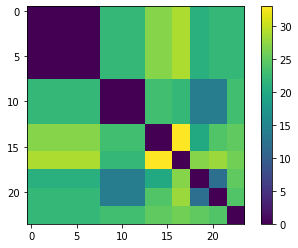

In [71]:
plt.imshow(dist)
plt.colorbar()

### Export dataframes

In [72]:
# df.to_csv(df_file,sep=',')
# M = pd.DataFrame(dist)
# M.to_csv(dist_file,sep=',',header = False, index = False)

# III. Graph generation and plotting

In [73]:
# Create graph object
g = ig.Graph.Weighted_Adjacency(W,mode='undirected',attr='distance',loops=False)

### Node metadata

In [74]:
# Assigns a cluster value based on connected subgraphs. Useful for spring weight
g.vs['plot_cluster'] = g.clusters('strong').membership
# Add its frequency
cluster_series = g.get_vertex_dataframe().loc[:,'plot_cluster']
g.vs['freq_cluster'] = cluster_series.map(cluster_series.value_counts())

In [75]:
# Create the reduced cluster number, which groups together all disconnected sequences
VDF = g.get_vertex_dataframe().sort_values('freq_cluster',ascending=False)
repeated_seqs = VDF.loc[VDF['freq_cluster']!=1,'plot_cluster'].factorize()[0]
single_seqs = (max(repeated_seqs)+1)*\
                np.ones([len(VDF.loc[VDF['freq_cluster']==1,'plot_cluster'])],dtype=int)
VDF['plot_cluster_reduced'] = np.concatenate([repeated_seqs,single_seqs])
g.vs['plot_cluster_reduced'] = VDF.loc[:,'plot_cluster_reduced']

### Node color
Define the fields `plot_label`, which will be the label in the legend of the plot, and `color` for each node. Depending on the type of label, the colouring and the labels will be different.

In [76]:
# # Assign a feature to color plot
# g.vs['plot_label'] = df.loc[:,'Sample'].values
# ## COLOR PALETTE ##
# # Define unique group labels
# _, idx = np.unique(g.vs['plot_label'],return_index=True)
# labs = np.array(g.vs['plot_label'])[np.sort(idx)]
# n_labs = len(labs)
# # Create color pallete based on number of groups
# pal = ig.drawing.colors.ClusterColoringPalette(n_labs)
# label2RGB = {l:pal.get_many(c)[0] for c,l in enumerate(labs)} # Numbering each label
# g.vs['color'] = [label2RGB[l] for l in g.vs['plot_label']]
g.vs['color'] = df.loc[:,'color'].values

### Node shape

In [77]:
g.vs['shape'] = df['tissue'].values

### Edge metadata

In [78]:
edges_array = np.array(g.get_edgelist()) # list of edges (node,node)
# Distance of every edge according to the distance matrix
edge_dist = np.array([dist[tuple(i)] for i in edges_array])
# Edge atributes
g.es['distance'] = edge_dist
#g.es['width'] = [edge_width if (edge['distance']==0 ) else edge_width/2 for edge in g.es]
g.es['width'] = edge_width
#g.es['color'] = ["black" if (edge['distance']>0 ) else "red" for edge in g.es]

### Graph layout
Creates a layout with the algorithm given by the keyword `layout_name` 

In [79]:
# Initialize layout with a seed (reproducibility)
random.seed(42)
np.random.seed(42)
layout_seed = np.random.random([len(g.vs),2])

# ToDo: Implement MDS and LgL

In [80]:
# Reingold-Fruchterman
if layout_name == 'FR':
    niter = 10000
    weights = kxs.prop_log_weights(g)
    g.es['weights'] = weights*2
    l = g.layout_fruchterman_reingold(weights=weights,\
                                      seed=layout_seed,niter=niter)
# Davidson-Harel
elif layout_name == 'DH':
    maxiter = 80
    fineiter = 15
    cool_fact = 0.95
    weight_node_dist = 75
    weight_border = 20000000
    weight_edge_lengths = 0.05
    weight_edge_crossings = 1000
    weight_node_edge_dist = 10000
    l = g.layout_davidson_harel(seed=layout_seed, maxiter=maxiter, fineiter=fineiter,\
                                       cool_fact=cool_fact, weight_node_dist=weight_node_dist,\
                                       weight_border=weight_border,\
                                       weight_edge_lengths=weight_edge_lengths,\
                                       weight_edge_crossings=weight_edge_crossings,\
                                       weight_node_edge_dist=weight_node_edge_dist)
# Graphopt
elif layout_name == 'GO':
    niter = 500
    node_charge = 0.03
    node_mass = 5
    spring_length = 5
    spring_constant = 0.8
    max_sa_movement = 12
    l = g.layout_graphopt(niter=niter, node_charge=node_charge, node_mass=node_mass,\
                          spring_length=spring_length, spring_constant=spring_constant,\
                          max_sa_movement=max_sa_movement, seed=layout_seed)

#### Plot generation

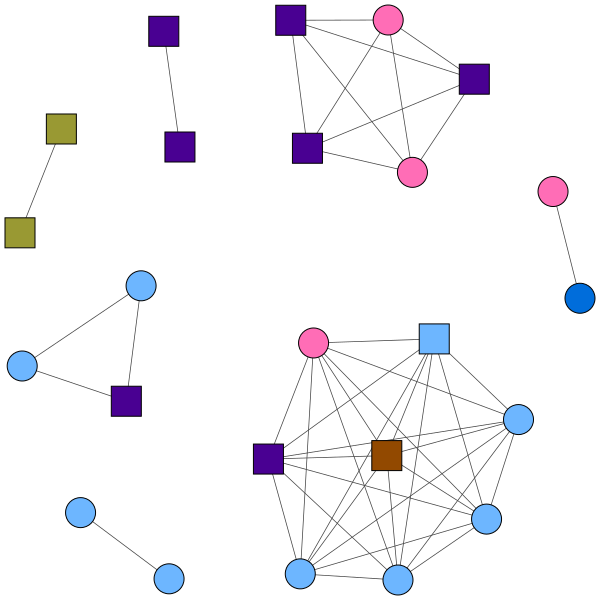

In [81]:
visual_style = {
    'bbox' : (0, 0, 600, 600),
    'layout' : l,
    "margin": 20,
    "autocurve" : False,
    #'edge_width' : g.es['width'],
    'vertex_size' : node_size
}
ig.plot(g,**visual_style)

### Plotting with legend

In [82]:
label_h = 0.4*unit
width,height = (24*unit,18*unit)

In [83]:
label2RGB = color_dict

In [84]:
# Construct the plot
plot = ig.Plot(fig_name, bbox=(width,height), background="white")
plot.add(g, bbox=(1*unit, 1*unit, width-7*unit, height-1*unit),\
         vertex_size=node_size,layout=l)
# Make the plot draw itself on the Cairo surface
plot.redraw()
# Grab the surface, construct a drawing context
ctx = cr.Context(plot.surface)
# Legend rectangle
rect_height = label_h*len(label2RGB) + label_h
rect_width = 3*unit # Change if the label is too long/short
coord = [19*unit,9*unit-rect_height/2] # standing coordinates x,y

ctx.rectangle(coord[0],coord[1], rect_width, rect_height)
ctx.set_source_rgb(1, 1, 1)
ctx.fill_preserve()
ctx.set_source_rgb(0, 0, 0)
ctx.set_line_width(2)
ctx.stroke()

# Legend items
coord[0]=coord[0]+label_h
for l in label2RGB.keys():
    # Circle
    coord[1] = coord[1] + label_h
    ctx.move_to(coord[0],coord[1])
    ctx.arc(coord[0],coord[1], 0.1*unit, 0, 2*pi)
    ctx.close_path()
    rgb = ImageColor.getcolor(label2RGB[l], "RGB")
    ctx.set_source_rgb(rgb[0]/255,rgb[1]/255,rgb[2]/255) #R,G,B
    ctx.fill()
    # Text
    ctx.set_source_rgb(0, 0, 0)
    ctx.set_font_size(0.3*unit)
    ctx.select_font_face("Arial",
                         cr.FONT_SLANT_NORMAL,
                         cr.FONT_WEIGHT_NORMAL)
    ctx.move_to(coord[0]+0.3*unit,coord[1]+0.1*unit)
    ctx.show_text('cluster ' + str(l))

# Save the plot
plot.save(fig_name)